<a href="https://colab.research.google.com/github/hmh10098/d2l/blob/main/8_3_LanguageModelandDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     |████████████████████████████████| 83 kB 1.2 MB/s 


In [2]:
import torch
import random
from d2l import torch as d2l

In [26]:
tokens = d2l.tokenize(d2l.read_time_machine())
corpus = [token for line in tokens for token in line]
vocab = d2l.Vocab(corpus)
vocab.token_freqs[:10]

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

In [82]:
vocab.idx_to_token[0:10]

['<unk>', 'the', 'i', 'and', 'of', 'a', 'to', 'was', 'in', 'that']

In [5]:
len(vocab)

4580

In [8]:
freqs = [freq for token, freq in vocab.token_freqs]
freqs[0:10]

[2261, 1267, 1245, 1155, 816, 695, 552, 541, 443, 440]

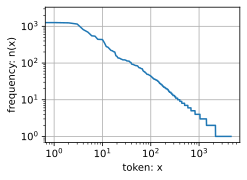

In [12]:
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)', xscale='log',
         yscale='log')

In [19]:
bigram_tokens = [[pair for pair in zip(
    line[:-1], line[1:])] for line in tokens]
bigram_vocab = d2l.Vocab(bigram_tokens)
print(bigram_vocab.token_freqs[:10])

[(('of', 'the'), 297), (('in', 'the'), 161), (('i', 'had'), 126), (('and', 'the'), 104), (('i', 'was'), 104), (('the', 'time'), 97), (('it', 'was'), 94), (('to', 'the'), 81), (('as', 'i'), 75), (('of', 'a'), 69)]


In [21]:
trigram_tokens = [[triple for triple in zip(line[:-2], line[1:-1], line[2:])]
                  for line in tokens]
trigram_vocab = d2l.Vocab(trigram_tokens)
print(trigram_vocab.token_freqs[:10])

[(('the', 'time', 'traveller'), 53), (('the', 'time', 'machine'), 24), (('the', 'medical', 'man'), 22), (('it', 'seemed', 'to'), 14), (('it', 'was', 'a'), 14), (('i', 'saw', 'the'), 13), (('i', 'did', 'not'), 13), (('i', 'began', 'to'), 13), (('said', 'the', 'time'), 12), (('seemed', 'to', 'me'), 12)]


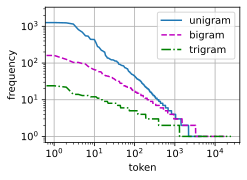

In [23]:
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token',
         ylabel='frequency', xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])

In [69]:
def seq_data_iter_random(corpus, batch_size, num_steps):
  corpus = corpus[random.randint(0, num_steps - 1):]
  num_subseqs = (len(corpus) - 1) // num_steps
  initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
  random.shuffle(initial_indices)

  def data(pos):
    return corpus[pos:pos + num_steps]

  num_batches = num_subseqs // batch_size
  for i in range(0, batch_size * num_batches, batch_size):
    initial_indices_per_batch = initial_indices[i:i + batch_size]
    X = [data(j) for j in initial_indices_per_batch]
    Y = [data(j + 1) for j in initial_indices_per_batch]
    yield torch.tensor(X), torch.tensor(Y)

In [70]:
my_seq = list(range(35))
for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

X:  tensor([[27, 28, 29, 30, 31],
        [22, 23, 24, 25, 26]]) 
Y: tensor([[28, 29, 30, 31, 32],
        [23, 24, 25, 26, 27]])
X:  tensor([[17, 18, 19, 20, 21],
        [ 7,  8,  9, 10, 11]]) 
Y: tensor([[18, 19, 20, 21, 22],
        [ 8,  9, 10, 11, 12]])
X:  tensor([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16]]) 
Y: tensor([[ 3,  4,  5,  6,  7],
        [13, 14, 15, 16, 17]])


In [77]:
def seq_data_iter_sequential(corpus, batch_size, num_steps): 
    offset = random.randint(0, num_steps)
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    Xs = torch.tensor(corpus[offset:offset + num_tokens])
    Ys = torch.tensor(corpus[offset + 1:offset + 1 + num_tokens])
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)
    print(Xs)
    print(Ys)
    num_batches = Xs.shape[1] // num_steps
    for i in range(0, num_steps * num_batches, num_steps):
        X = Xs[:, i:i + num_steps]
        Y = Ys[:, i:i + num_steps]
        yield X, Y

In [78]:
for X, Y in seq_data_iter_sequential(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

tensor([[ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
        [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]])
tensor([[ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]])
X:  tensor([[ 5,  6,  7,  8,  9],
        [19, 20, 21, 22, 23]]) 
Y: tensor([[ 6,  7,  8,  9, 10],
        [20, 21, 22, 23, 24]])
X:  tensor([[10, 11, 12, 13, 14],
        [24, 25, 26, 27, 28]]) 
Y: tensor([[11, 12, 13, 14, 15],
        [25, 26, 27, 28, 29]])


In [79]:
class SeqDataLoader: 
    """An iterator to load sequence data."""
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            self.data_iter_fn = d2l.seq_data_iter_random
        else:
            self.data_iter_fn = d2l.seq_data_iter_sequential
        self.corpus, self.vocab = d2l.load_corpus_time_machine(max_tokens)
        self.batch_size, self.num_steps = batch_size, num_steps

    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

In [80]:
def load_data_time_machine(batch_size, num_steps,
                           use_random_iter=False, max_tokens=10000):
    """Return the iterator and the vocabulary of the time machine dataset."""
    data_iter = SeqDataLoader(batch_size, num_steps, use_random_iter,
                              max_tokens)
    return data_iter, data_iter.vocab